# 1. Hashing task!

# Bloom Filter

In this script is, a variation of polinomial rolling hash function is used with bloom filter to efficiently search for week passwords.

The script has 2 main parts;

1st part is formation of bloom filter with passwords1.txt data set

2nd part is searching for passwords in passwords2.txt data set

# Formation of bloom filter

To form the bloom filter, we need to define parameter values such as size of the bloom filter (m) and the number of hash functions (k) to be used. To calculate these parameters, firtst a False Positive error rate *p* needed to be defined. For a better understanding please reffer to https://hackernoon.com/probabilistic-data-structures-bloom-filter-5374112a7832

For this task, we define *p = 0.05*

## Imports

In [1]:
import numpy as np
import time

## Parameter Values

In [3]:
n=0
with open("passwords1.txt", 'r') as f:
    for line in f:
        n += 1
error = 0.05
m = int(-(n*np.log(error))/(np.log(2)**2))
k = int((m/n)*np.log(2))

# Hash Function

The hash function used is a variant of polynomial rolling hash function. the refference is https://cp-algorithms.com/string/string-hashing.html

To create k different hash functions from polynomial rolling hash function. We create 4 different arrays with random numbers between 0 and 20. these numbers are the powers of the multiplyer for each character of the passwords. Here the multiplyer is 127 because the passwords can be formed by at most 127 different characters.

In [4]:
np.random.seed(0)
seed_list = np.random.randint(127, size=k) #set seed
"""########## Hash functions ##########"""
def hash_func(numeric_pass, m, k, seed_list, p=127): # randomized polynomial rolling hash function.
    hash_list = []
    seed = 0
    for _ in range(k):
        np.random.seed(seed_list[seed])
        degrees = np.random.randint(20, size=20)
        count = 0
        sums = 0
        seed += 1
        for num in numeric_pass:
            val = int(num) * (p ** int(degrees[count]))
            sums += val
            count +=1
        hash_list.append(int(sums % m))
    return hash_list

# Create the Bloom Filter

This part is executed and bloom filter formed before. For the sake of run time, here we are not running this code chunk. 

### Run time for Bloom filter formation is 13517 seconds (3.45 hours)

In [5]:
"""from numpy import save
bloom_filter = np.zeros(m, dtype=int)
# read data
with open("passwords1.txt","r") as f:
    for line in f:
        password = (line[:-1])
        #find the alphabet position of each letter
        numeric_pass = list(map(ord, password))
        hash_list = hash_func(numeric_pass, m, k, seed_list, p=127)
        for num in hash_list:
            bloom_filter[num] = 1

save('bloom_filter.npy', bloom_filter)"""

'from numpy import save\nbloom_filter = np.zeros(m, dtype=int)\n# read data\nwith open("passwords1.txt","r") as f:\n    for line in f:\n        password = (line[:-1])\n        #find the alphabet position of each letter\n        numeric_pass = list(map(ord, password))\n        hash_list = hash_func(numeric_pass, m, k, seed_list, p=127)\n        for num in hash_list:\n            bloom_filter[num] = 1\n\nsave(\'bloom_filter.npy\', bloom_filter)'

# Searching For weak Passwords

In [6]:
bloom_filter = np.load("bloom_filter.npy") # load the bloom filter

In [8]:
""" search for paswords in paswords2.txt by using the bloom filter"""
start = time.time()
# read data
maybe = 0
with open("passwords2.txt","r") as f:
    for line in f:
        password = (line[:-1])
        #find the alphabet position of each letter
        numeric_pass = list(map(ord, password))
        hash_list = hash_func(numeric_pass, m, k, seed_list, p=127)
        fp = 0
        for num in hash_list:
            if bloom_filter[num] == 1:
                fp += 1
            else:
                break
        if fp == k:
            maybe += 1
finish = time.time()
execution_time = (finish-start)

In [10]:
execution_time

2806.2684020996094

In [14]:
print('Number of hash function used: ', k)
print('Number of duplicates detected: ', maybe)
print('Probability of false positives: ', error)
print('Execution time: ',str(execution_time +13517))

Number of hash function used:  4
Number of duplicates detected:  15255783
Probability of false positives:  0.05
Execution time:  16323.26840209961


## exact number of dublicates(Bonus)

In [1]:
file1 = set(line.strip() for line in open('passwords1.txt'))
file2 = set(line.strip() for line in open('passwords2.txt'))
common = 0 
for line in file1 & file2:
    if line:
        common +=1
print("exact number of Dublicates: ",common)

exact number of Dublicates:  14000000


# 2. Alphabetical Sort

### 1. Build your own implementation of Counting Sort. If it's based (based, not copied!) on some reference on Internet, please cite it.

We learnt about Counting Sort in this video: https://www.youtube.com/watch?v=TTnvXY82dtM. 

As the input, we have the unsorted list of numbers. We create a list (let's call it "counter") of length between maximum value and minimum value in the input list.  We put the number of occurences of each number of the input list in the new list at the corresponding position. 

Then, we create another list. Let's call it "sum counter". Its first cell is the same as in "counter" list. The next ones sums all the previous cells and the corresponding cell in the "counter". 

The last step is to create the final list of the same length as the input list. We look at the first number in the input array. It is now our index. We look at the corresponding position in the "sum counter" and put its value in the final array. We reduce the value of "sum_counter" by one. Then we repeat it for all the numbers in the input array.


## Counting sort Function

In [1]:
def Counting_Sort(a):
    counter_range=max(a)-min(a)+1 #O(1)
    counter=[0]*counter_range #O(1)

    for i in a: #O(n)
        counter[i-min(a)]+=1 #O(1)

    sum_counter=counter #O(1)
    for j in range(1,counter_range): #O(m)
        sum_counter[j]=sum_counter[j-1]+counter[j] #O(1)

    final=[0]*len(a) #O(1)

    for k in a: #O(n)
        final[sum_counter[k-min(a)]-1]=k #O(1)
        sum_counter[k-min(a)]-=1 #O(1)

    return final

Information for the next task - this algorithm works in linear time O(n+m). We cannot say which value is bigger. We use n as the length of the input array and m as the length of counter (and counter_sum).

### 2. Build an algorithm, based on your implementation of Counting Sort, that receives in input a list with all the letters of the alphabet (not in alphabetical order), and returns the list ordered according to alphabetical order. Discuss time complexity (theoretically and empirically).

As was said on Slack, we consider only lowercase letters. The algorithm is the same as in the previous exercise. The only thing we have to do is converting letters to numbers - we do it through ASCII table. We put in comments the running time of each step using big O notation. It should run in linear time bacause none "for" loop has another loop inside.

## Alphabetical Order Function (Character sorting)

In [2]:
def Alphabetical_Order(b):
    import string
    a=[] #O(1)

    for index in range(len(b)): #O(n)
        a.append(ord(b[index])) #O(1)
    
    a=Counting_Sort(a) #O(n) - in this case lengths of input list and the counter are the same because we take as input a list of ALL letters of the alphabet
    
    answer=[] #O(1)
    for i in a: #O(n)
        answer.append(chr(i)) #O(1)

    return answer #O(1)


The algorithm runs in linear time - O(n+n+constants) which we can simplify to O(n).

## Test case for character sorting

In [48]:
import time

start_time = time.time()

b=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m']
Alphabetical_Order(b)

print("The running time is {} seconds".format(time.time() - start_time))

The running time is 0.0 seconds


### 3. Build an algorithm, based on your implementation of Counting Sort, that receives in input a list of length m, that contains words with maximum length equal to n, and returns the list ordered according to alphabetical order. Discuss time complexity (theoretically and empirically).

As was said on Slack, we consider only lowercase letters.<br>
We got the idea of Radix sort from https://pastebin.com/tTD7QSsb.

## Alphabetical Order Function (word sorting)

In [3]:
import string

def Alphabetical_Order_Words(b):
    m=len(b)
    n=max(len(w) for w in b) #O(m)
    #We set equal lengths of each string by adding "|" at the end of shorter words
    new_b=[] 
    for word in b: #O(m)
        new_arr = ['|' * (n - len(word))]
        new_b.append(word+''.join(new_arr))


    letters=[]
    dic={}

    
    for indexx in range(n-1,-1,-1): #O(n)
        #We convert characters to numbers using ASCII table
        a=[[] for _ in range(m)]

        for index in range(m): #O(m)
            for index_2 in range(n): #O(n)
                x=list(new_b[index])
                a[index].append(ord(x[index_2]))


                
        #We create lists of letters, starting from the last letter of each word
        for i in range(m): #O(m)
            letters.append(a[i][indexx])


         
        #We create dictionary whose keys are words and values are following letters, from the last to the first one
        dic={}
        
        for i in range(m): #O(m)
            dic[new_b[i]]=letters[i]


        letters=Counting_Sort(letters) #We sort letters alphabetically

        #We create a dictionary to store words sorted by following characters
        final={}
        for i in range(m): #O(m)
            for word in new_b: #O(m)
                if dic[word]==letters[i]: #O(1)
                    final[word]=letters[i]
        letters=[]
        dic=final #We keep previously sorted dictionary for next iterations

        sorted_list=[] #We  create list of sorted words
        for i in dic: #O(m)
            sorted_list.append(i)

        new_b=[] #We store sorted words in a list
        for i in dic: #O(m)
            new_b.append(i)


    return ([i.replace('|', '') for i in sorted_list]) #O(m)


We put running time of each step in the comments. We did not take into account the constant time because it is not significant if we already have O(n). The running time of the whole algorithm is O(m+m+m+n*((m+n)+m+m+(m+m)+m+m) which we can simplify to O(n^2+m*n).


## Test case for word sorting

In [49]:
start_time = time.time()

b=['algorithmic','methods','for','data','mining','sapienza university','abaaa','ab aaaa']
Alphabetical_Order_Words(b)

print("The running time is {} seconds".format(time.time() - start_time))

The running time is 0.0009975433349609375 seconds


# 3. Find similar wines!

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

## Cleaning and setting Dataframe

In [5]:
wines = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline'] 
# I create the columns name based on the file wine.names

In [6]:
f=pd.read_csv('wine.data',names=wines)

## Dropping the NaN values

In [7]:
pd.DataFrame.drop(f,['Class'],axis=1,inplace=True)

# I remove the columns class, and I drop the empty space (NaN) replace with 0. 

In [8]:
f.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Standardize to avoid a big influence from variable like Proline and Magnesium


In [9]:
scaler = StandardScaler()

# I standardize to avoid the influence of big variable.

In [10]:
scaled_array = scaler.fit_transform(f)

# I apply the standardization for all the columns of f(dataframe) with the function fit

In [11]:
scaled_data= pd.DataFrame( scaled_array, columns = f.columns )

In [12]:
scaled_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Defining the Kmeans


In [13]:
def Kmeans(array,k):
    
    def initialize_centroids(array,k):
        initial_centroids = np.random.permutation(array.shape[0])[:k]
        centroids = array[initial_centroids]
        return centroids
    
    # I define the initialize centroids that consists of making a random list of centroids.
    
    lis_initial_centroids = initialize_centroids(array,k)
    
    def assign_centroids(array,centroids):
        lis_clustering=[]
        for e in array:
            d_e = []
            for i in range(k):
                d = distance.euclidean(e,centroids[i])
                d_e.append(d)
            min_distance=min(d_e)
            lis_clustering.append((d_e.index(min_distance)+1))
        lis_clustering= np.array(lis_clustering)
        clusters_to_append = lis_clustering.reshape(178,1)   
        new_array = np.append(array,clusters_to_append,axis=1)
        return new_array
    
    # I assign for each data the nearest centroid. Create the clusters.  
    
    new_array = assign_centroids(scaled_array,lis_initial_centroids)
    
    def new_centroids(new_array):
        lis_centroids = []
        centroids = []
        for i in range(k):
            lis_centroids.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == new_array[j][13]:
                    lis_centroids[i].append(new_array[j])
        for i in range(k):
            lis_centroid = lis_centroids[i]
            lis_centroid = np.delete(lis_centroid,13,axis=1)
            new_centroid = np.mean(lis_centroid,axis=0)
            centroids.append(new_centroid)
        return centroids
    
    # I calculate the mean for each clusters. Make the new centroids.
   
    centroids = new_centroids(new_array)
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def update_centroids(initial_centroids):
        centroids_old = np.zeros((k,12))
        centroids = initial_centroids
        numItem = 0
        while ([list(elem) for elem in centroids_old] != [list(elem) for elem in centroids]):
            numItem += 1
            centroids_old = centroids.copy()
            new_array = assign_centroids(scaled_array,centroids_old)
            centroids = new_centroids(new_array)
        return numItem,centroids,centroids_old
    
    # Update_centroids,needs to repeat the reassignment of new_centroids until the old_centroids = new_centorids.
    
    numItem = update_centroids(lis_initial_centroids)[0]
    
    # numItem is the nums of iterations that happens until old_centroids = new_centorids
    
    centroids = update_centroids(lis_initial_centroids)[1]
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def clustering(array):
        lis_clusters = []
        clusters = []
        for i in range(k):
            lis_clusters.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == array[j][13]:
                    lis_clusters[i].append(array[j])
        for i in range(k):
            cluster = lis_clusters[i]
            cluster = np.delete(cluster,13,axis=1)
            clusters.append(cluster)
        return clusters
    
    # Reassign data to the new_centroids.
    
    clusters = clustering(final_array)
    
    def dissimilarity(clusters,centroids):
        Dist = []
        for c in range (len(clusters)):
            Dist_cluster = ([])
            for e in clusters[c]:
                Dist_cluster += [(distance.euclidean(e,centroids[c]))**2]
            Dist += [Dist_cluster]
        final_dist = []
        for e in Dist:
            e = (sum(e))
            final_dist += [e]
        totDist = (sum(final_dist))
        return totDist
    
    # Clculate dissimilarity, the total distance from each data and its own centroids. 
    
    totDist = dissimilarity(clusters,centroids)
    
    return totDist,clusters,centroids,final_array

In [14]:
results = Kmeans(scaled_array,3)

### Defining TryKmeans, that we need to repeat a lot of time the k-means. This allowed us to take better centroids and to decrease dissimilarity. More we increase the repetitions numer lower will be dissimilarity and more reliable will be the clusters.

In [15]:
def tryKmeans(rep):
    best = Kmeans(scaled_array,3)
    minDissimilarity = best[0]
    for trial in range(rep):
        result = Kmeans(scaled_array,3)
        currDissimilarity = result[0]
        if currDissimilarity < minDissimilarity:
            best = result
            minDissimilarity = currDissimilarity       
    return best
    
# Try Kmeans consist on the repetition of K-means and the results is the best Kmeans otherwise the Kmeans with smaller dissimilarity.

In [16]:
best = tryKmeans(10)

## Defining Elbow Method that we need to optimized k variable of K-means

In [17]:
def elbowMethod(rep):
    Tot_dissimilarity = []
    for i in range(1,rep):
        dissimilarity = (Kmeans(scaled_array,i)[0],i)
        Tot_dissimilarity += [dissimilarity]
        
    return Tot_dissimilarity

# The elbow method calculate the dissimilarity for increasing k. The aim is the optimization of k. 

In [18]:
elbow = elbowMethod(11)

In [19]:
elbow

# How can we see the main difference is beetween 2 and 3. 

[(2313.9999999999986, 1),
 (1659.9511977619795, 2),
 (1277.9284888446423, 3),
 (1180.1665831581074, 4),
 (1152.9778480701639, 5),
 (1078.7546723761488, 6),
 (1019.5153473746163, 7),
 (976.1976652044661, 8),
 (912.4353908517338, 9),
 (888.5010037942775, 10)]

## How Elbow Method underline the cost decrease drastically from k = 2 to k = 3, for this reason k = 3 is the best k that we can take

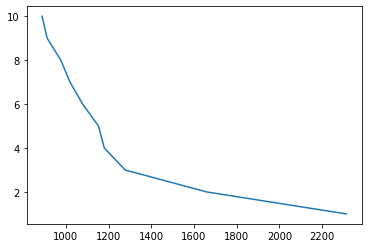

In [20]:
X = []
Y = []
for elem in elbow:
    X += [elem[0]]
    Y += [elem[1]]
pl.plot(X, Y)              
pl.show()    

## Reassigning the data to respective clusters, arranging new Dataframe.


In [21]:
final_cluster = []
for i in best[3]:
    final_cluster += [i[13]]

In [22]:
final_cluster = pd.DataFrame(final_cluster,columns = ['cluster'])

In [23]:
df = scaled_data.join(final_cluster)

In [24]:
main_df = f.join(final_cluster)

In [25]:
main_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.0


In [26]:
main_df = main_df.set_index(main_df['cluster'])

In [27]:
main_df = main_df.sort_index()

In [28]:
main_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,cluster
cluster,,,,,,,,,,,,,,
1.0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1.0
1.0,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235,1.0
1.0,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095,1.0
1.0,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920,1.0
1.0,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,1.0


## Analizing the features

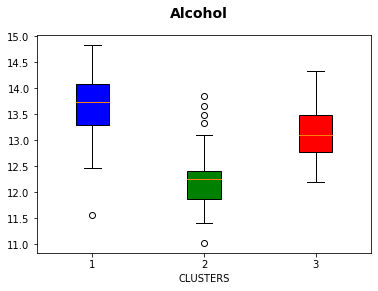

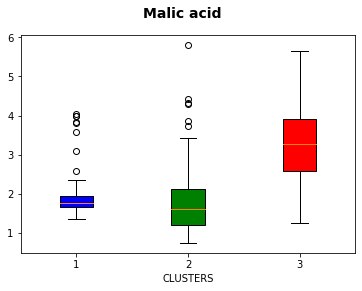

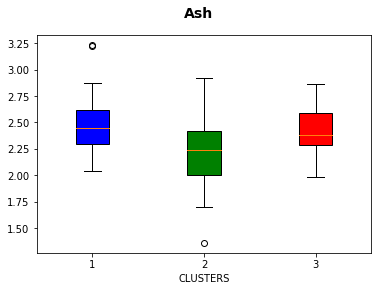

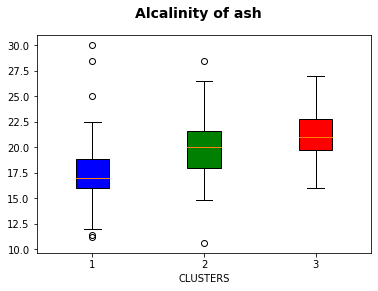

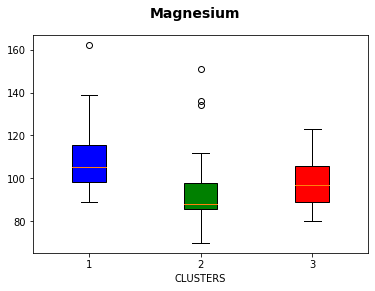

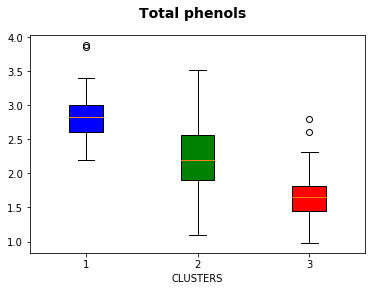

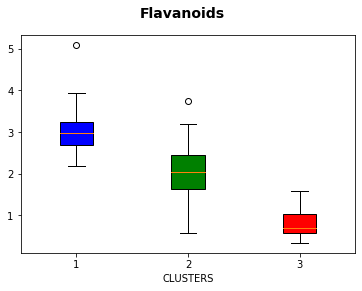

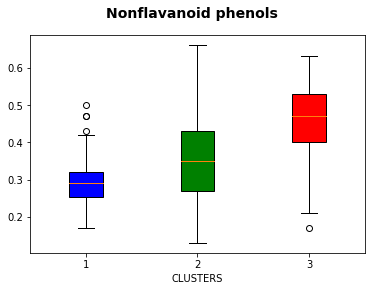

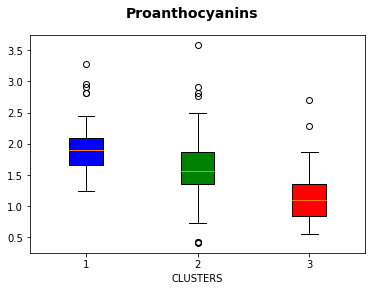

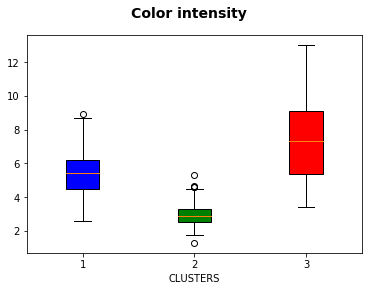

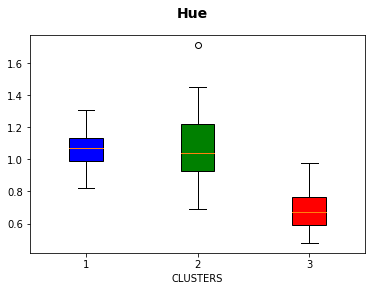

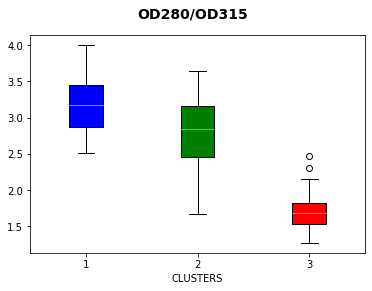

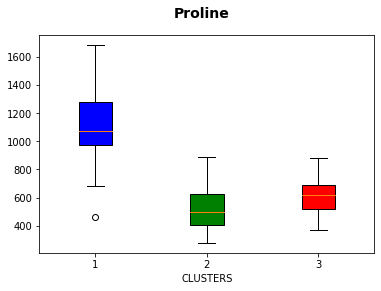

In [29]:
for i in range(1,len(wines)):
    c_1 = (main_df.loc[1.0,[wines[i]]]).values.tolist()
    c_2 = (main_df.loc[2.0,[wines[i]]]).values.tolist()
    c_3 = (main_df.loc[3.0,[wines[i]]]).values.tolist()
    x = [c_1,c_2,c_3]
    fig = plt.figure()
    fig.suptitle(wines[i], fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.set_xlabel('CLUSTERS')
    box = plt.boxplot(x, patch_artist=True)
    colors = ['blue', 'green','red']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.show()

## How can we see for example in the color intensity and in Alcohol, the clusters have different characteristics.

C:\Users\Onur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Onur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


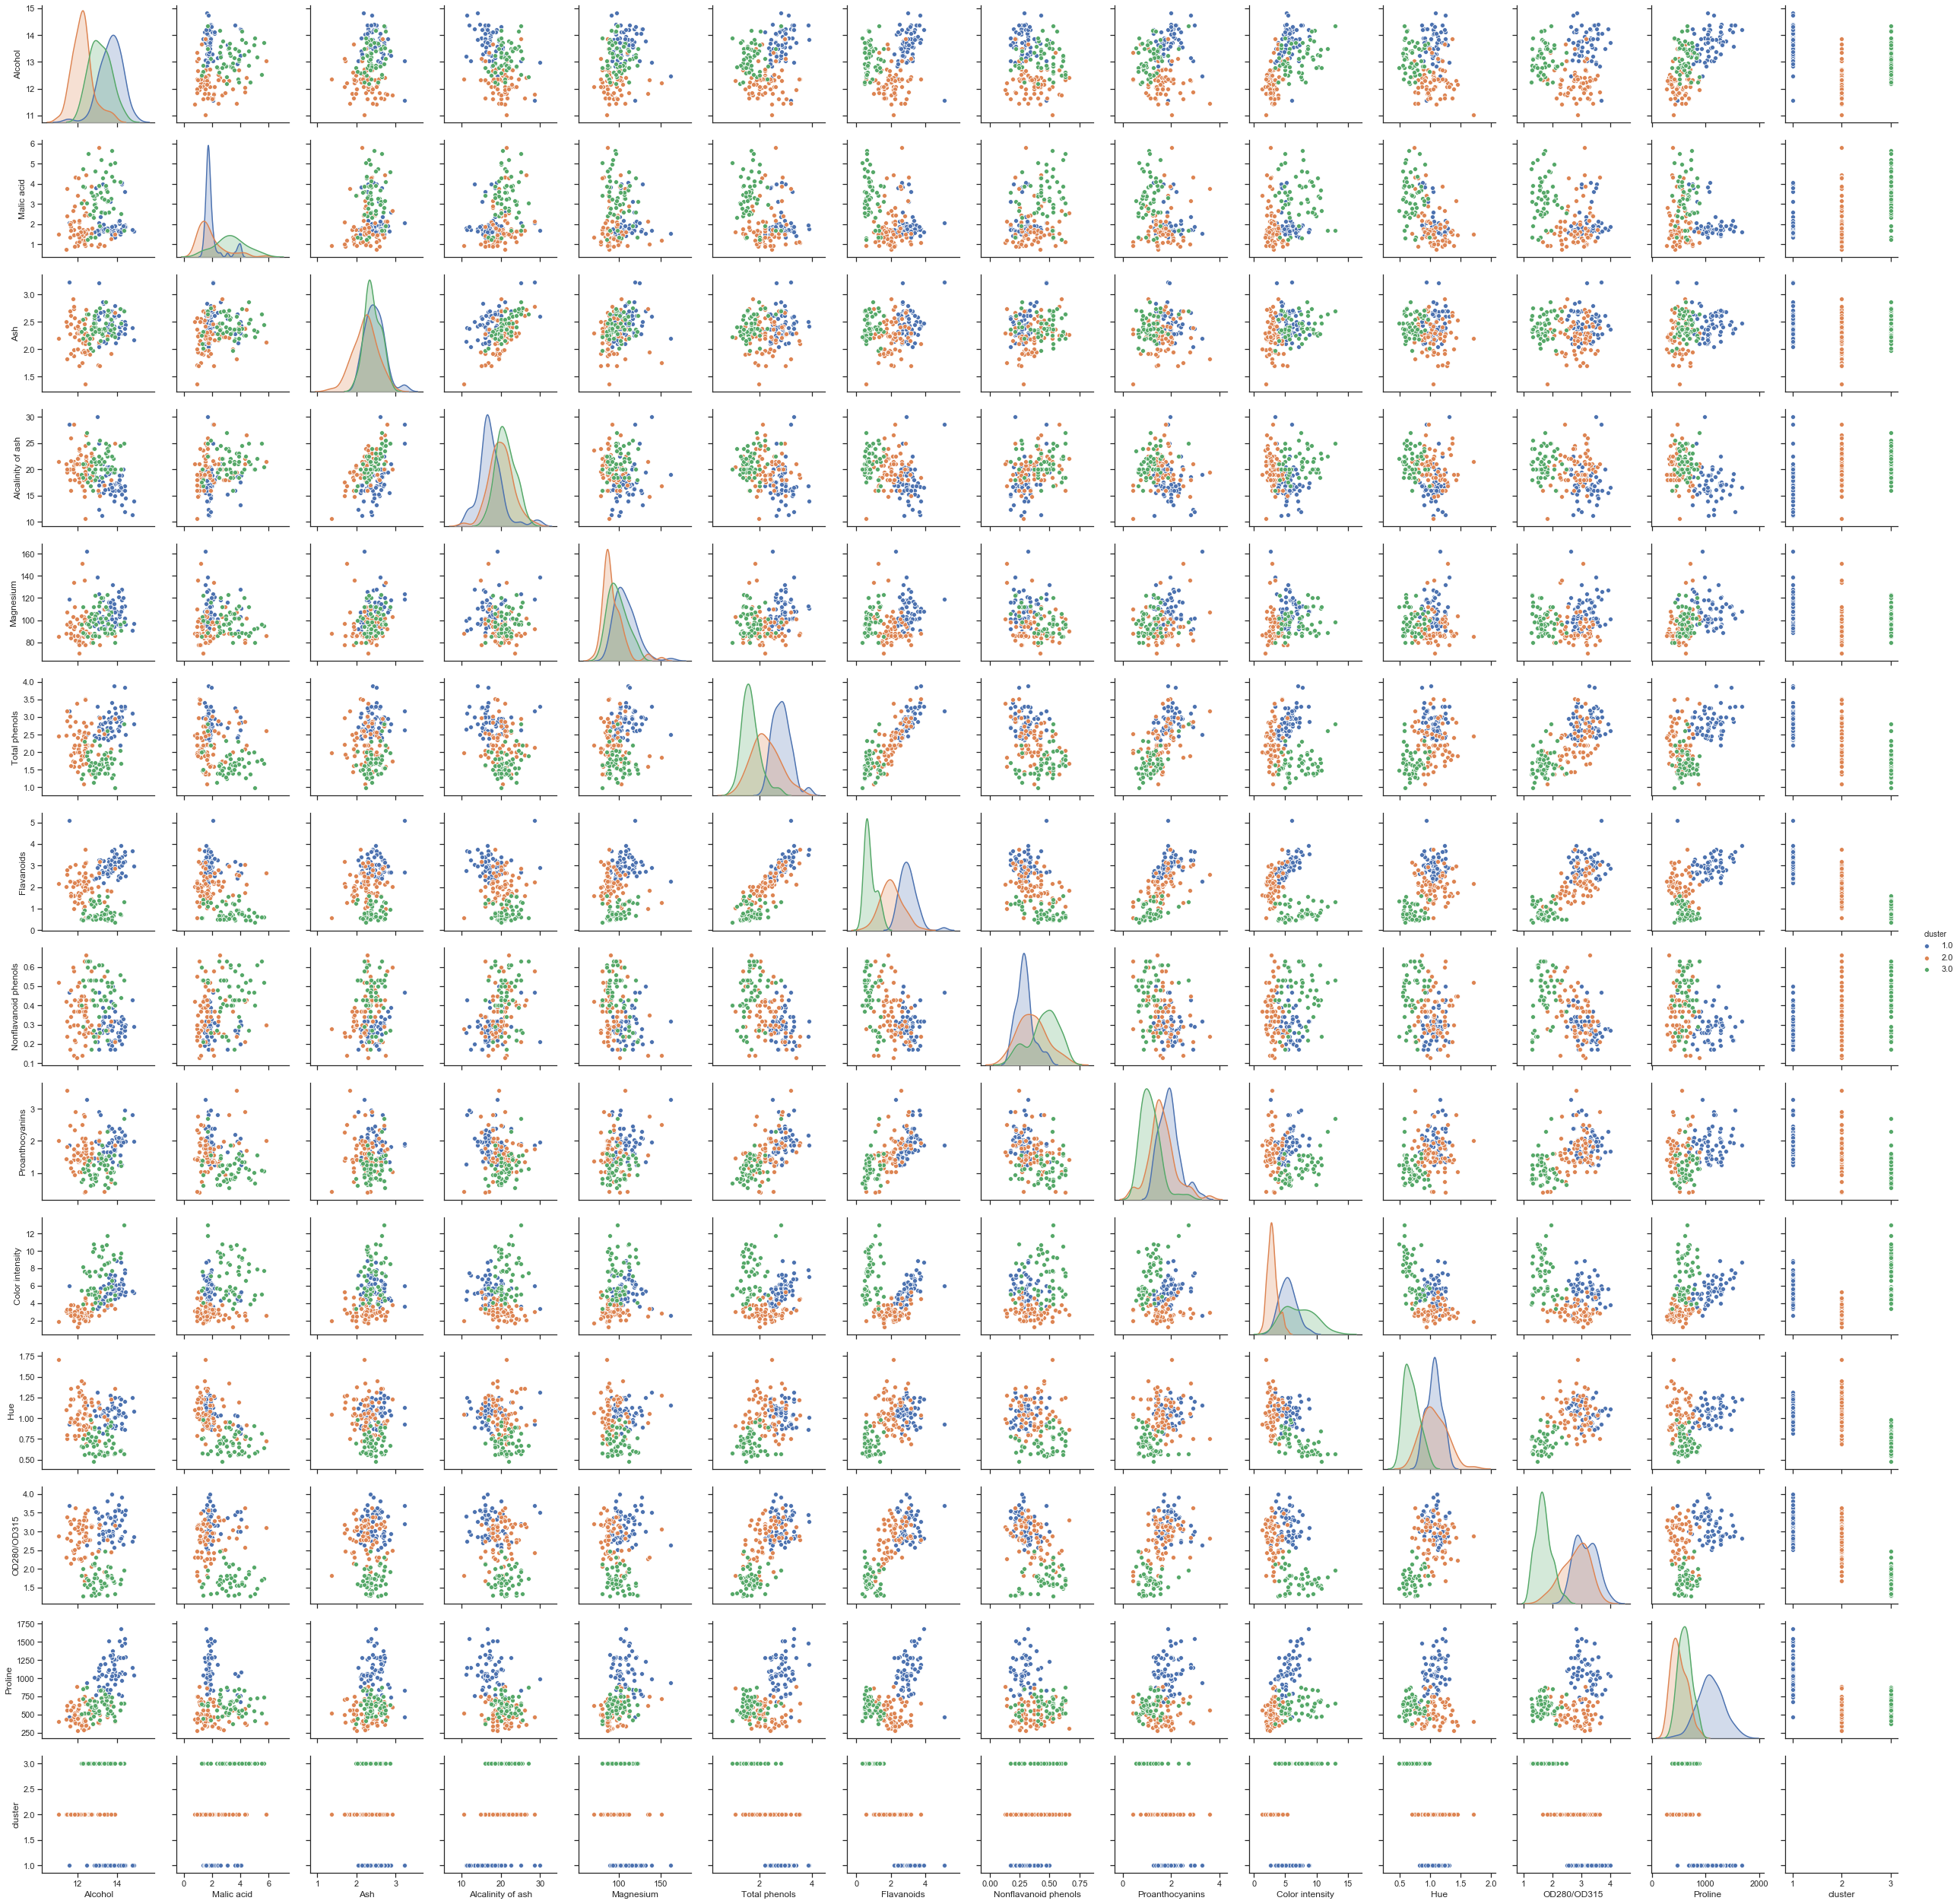

In [30]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(main_df,hue = 'cluster')
plt.show()

# 4. K-means can go wrong!


## Importing Libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.spatial import distance

## Cleaning DataFrame

In [32]:
wines = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']

# I create the columns name based on the file wine.names

In [33]:
f=pd.read_csv('wine.data',names=wines)

## Dropping the NaN values

In [34]:
pd.DataFrame.drop(f,['Class'],axis=1,inplace=True)

# I remove the columns class, and I drop the empty space (NaN) replace with 0.

In [35]:
f.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Standardize to avoid a big influence from variable like Proline and Magnesium


In [36]:
scaler = StandardScaler()

# I standardize to avoid the influence of big variable.

In [37]:
scaled_array = scaler.fit_transform(f)

# I apply the standardization for all the columns of f(dataframe) with the function fit

In [38]:
scaled_data= pd.DataFrame( scaled_array, columns = f.columns )


In [39]:
scaled_data.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Defining the Kmeans

In [40]:
def Kmeans(array,k):
    
    def initialize_centroids(array,k):
        initial_centroids = np.random.permutation(array.shape[0])[:k]
        centroids = array[initial_centroids]
        return centroids
    
    # I define the initialize centroids that consists of making a random list of centroids.
    
    lis_initial_centroids = initialize_centroids(array,k)
    
    def assign_centroids(array,centroids):
        lis_clustering=[]
        for e in array:
            d_e = []
            for i in range(k):
                d = distance.euclidean(e,centroids[i])
                d_e.append(d)
            min_distance=min(d_e)
            lis_clustering.append((d_e.index(min_distance)+1))
        lis_clustering= np.array(lis_clustering)
        clusters_to_append = lis_clustering.reshape(178,1)   
        new_array = np.append(array,clusters_to_append,axis=1)
        return new_array
    
    # I assign for each data the nearest centroid. Create the clusters. 
        
    new_array = assign_centroids(scaled_array,lis_initial_centroids)
    
    def new_centroids(new_array):
        lis_centroids = []
        centroids = []
        for i in range(k):
            lis_centroids.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == new_array[j][13]:
                    lis_centroids[i].append(new_array[j])
        for i in range(k):
            lis_centroid = lis_centroids[i]
            lis_centroid = np.delete(lis_centroid,13,axis=1)
            new_centroid = np.mean(lis_centroid,axis=0)
            centroids.append(new_centroid)
        return centroids
   
    # I calculate the mean for each clusters. Make the new centroids.
    
    centroids = new_centroids(new_array)
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def update_centroids(initial_centroids):
        centroids_old = np.zeros((k,12))
        centroids = initial_centroids
        numItem = 0
        while ([list(elem) for elem in centroids_old] != [list(elem) for elem in centroids]):
            numItem += 1
            centroids_old = centroids.copy()
            new_array = assign_centroids(scaled_array,centroids_old)
            centroids = new_centroids(new_array)
        return numItem,centroids,centroids_old
    
    # Update_centroids,needs to repeat the reassignment of new_centroids until the old_centroids = new_centorids.
    
    numItem = update_centroids(lis_initial_centroids)[0]
    
    # numItem is the nums of iterations that happens until old_centroids = new_centorids
    
    centroids = update_centroids(lis_initial_centroids)[1]
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def clustering(array):
        lis_clusters = []
        clusters = []
        for i in range(k):
            lis_clusters.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == array[j][13]:
                    lis_clusters[i].append(array[j])
        for i in range(k):
            cluster = lis_clusters[i]
            cluster = np.delete(cluster,13,axis=1)
            clusters.append(cluster)
        return clusters
    
    # Reassign data to the new_centroids.
    
    clusters = clustering(final_array)
    
    def dissimilarity(clusters,centroids):
        Dist = []
        for c in range (len(clusters)):
            Dist_cluster = ([])
            for e in clusters[c]:
                Dist_cluster += [(distance.euclidean(e,centroids[c]))**2]
            Dist += [Dist_cluster]
        final_dist = []
        for e in Dist:
            e = (sum(e))
            final_dist += [e]
        totDist = (sum(final_dist))
        return totDist
    
    # Calculate dissimilarity, the total distance from each data and its own centroids. 
        
    totDist = dissimilarity(clusters,centroids)
    
    return totDist,clusters,centroids,lis_initial_centroids

In [41]:
results = Kmeans(scaled_array,3)


## Defining the Best Kmeans

In [42]:
def bestKmeans(rep):
    best = Kmeans(scaled_array,3)
    minDissimilarity = best[0]
    for trial in range(rep):
        result = Kmeans(scaled_array,3)
        currDissimilarity = result[0]
        if currDissimilarity < minDissimilarity:
            best = result
            minDissimilarity = currDissimilarity       
    return best[0],best[2],best[3]
    
# best Kmeans consists on the repetition of K-means and the results is the best Kmeans otherwise the Kmeans with smaller dissimilarity.

## Defining the Worst Kmeans

In [43]:

def worstKmeans(rep):
    worst = Kmeans(scaled_array,3)
    minDissimilarity = worst[0]
    for trial in range(rep):
        result = Kmeans(scaled_array,3)
        currDissimilarity = result[0]
        if currDissimilarity > minDissimilarity:
            worst = result
            minDissimilarity = currDissimilarity       
    return worst[0],worst[2],worst[3]

# worst Kmeans consists on the repetition of K-means and the results is the worst Kmeans otherwise the Kmeans with bigger dissimilarity.

# Results

In [44]:
best = bestKmeans(50)

In [45]:
worst = worstKmeans(50)

In [46]:
best

(1277.9284888446423,
 [array([-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
         -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
          0.46180361,  0.27076419, -0.75384618]),
  array([ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
         -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
         -1.16478865, -1.29241163, -0.40708796]),
  array([ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
          0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
          0.47398365,  0.77924711,  1.12518529])],
 array([[ 1.70390229,  1.12535692, -0.3162486 , -1.04947918,  0.1585717 ,
          1.53004659,  1.1452553 , -0.74014117,  1.04967557, -0.06838494,
          0.36217728,  1.16994702,  1.01300893],
        [ 0.92568536, -0.54429654,  0.15894572, -1.04947918, -0.75420173,
          0.48853108,  0.73362894, -0.57898505,  0.3838836 ,  0.23441405,
          0.84478453,  0.40722789,  1.8

In [47]:
worst


(1585.3921258374094,
 [array([-0.97456391, -0.41712759, -0.69396716,  0.23173679,  2.69795419,
          0.14937091, -0.05281166, -1.03559406,  1.77971063, -0.9191059 ,
          0.55960752,  0.21419404,  0.05076107]),
  array([-0.31817275,  0.31472807, -0.09692814,  0.45325137, -0.35200139,
         -0.73324672, -0.7680652 ,  0.58414173, -0.59880706,  0.09218315,
         -0.48686814, -0.67037386, -0.59374123]),
  array([ 0.43899096, -0.33065271,  0.1635149 , -0.53861933,  0.20245504,
          0.83203091,  0.88723585, -0.59409344,  0.55514983, -0.03707769,
          0.5179278 ,  0.75486538,  0.67899534])],
 array([[ 1.3086175 , -0.63406285, -0.3162486 , -1.04947918,  1.84369188,
          1.1294637 ,  1.1452553 , -0.98187536,  0.891988  ,  0.25604255,
          0.58154421,  1.55130658,  0.10542821],
        [-0.7048644 , -0.72382916, -0.27969519,  0.60208828, -0.96484175,
          0.7128575 ,  1.12517596,  0.22679555,  0.31380024, -0.48365212,
         -1.17339127,  0.32248133, -1.2

## Comparing the results the cost is higher where the initials centroids were bad chosen.

# Theoretical Explonation

K-means clustering is an itearative method that minimizes the cost function for each iteration. (Like a gradient descent algorithm)

The cost function is;

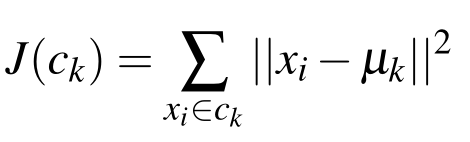

https://medium.com/dataregressed/k-means-clustering-the-premier-league-2592d1870dc5


So after the initialization of the cluster centers, the algorithm will perform a greedy approach to reduce the cost. This greedy approach makes the algorithm dependent on the cost of initial centers and algorithm stucks at the local minimum. In other words, for each different set of initial centers, there will a different cost. 
Like in the graph bellow,

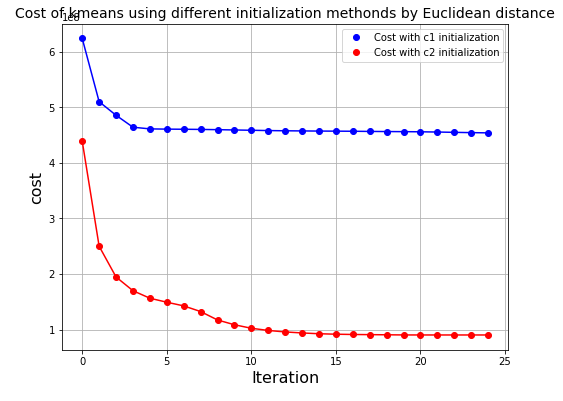

https://stackoverflow.com/questions/53633262/implementing-k-means-with-euclidean-distance-vs-manhattan-distance

As seen, depending on the initial centers, the k-means algorithm can return different costs. So a bad choice of initial centers will effect the performance of the algorithm.

The graph bellow shows how k-means clustering can stuck in local optimal

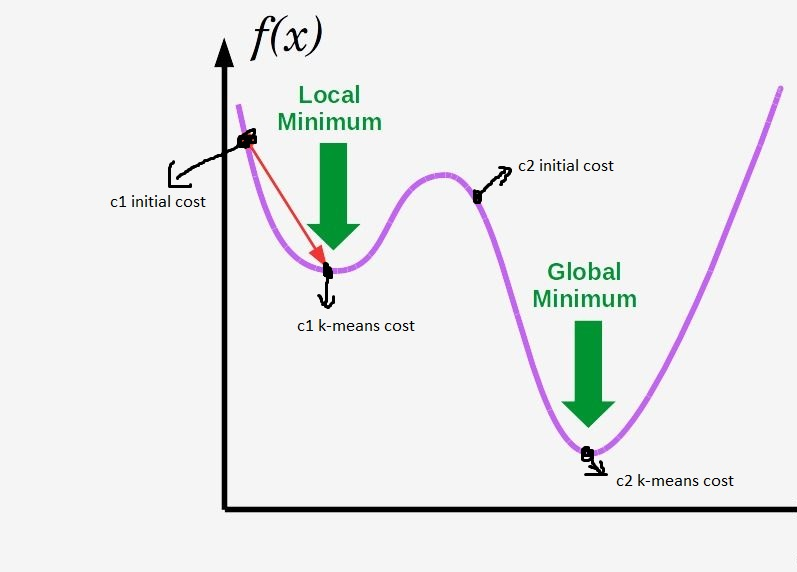

To avoid this problem, metaheuristic algorithms like simulated annealing or Genetic algorithm can be used to select the initial centers. But to find optimal solution,the cost of all possible initial centers should be calculated. Which will take exponential amount of time and in most of the cases, the set of nodes (centers) is a continuous set. So it is impossible to try all possibble points.